In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# Data can be downloaded at http://ufldl.stanford.edu/housenumbers/

In [3]:
mat = scipy.io.loadmat('Data/train_32x32.mat')
mat = mat['X']
b, h, d, n = mat.shape

In [4]:
# Grayscale
img_gray = np.zeros(shape =(n, b * h))

def rgb2gray(rgb):    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for i in range(n):
    #Convert to greyscale
    img = rgb2gray(mat[:,:,:,i])
    img = img.reshape(1, 1024)
    img_gray[i,:] = img

# Normalize
X_train = img_gray/255.

In [5]:
img_size = X_train.shape[1]
model = Sequential()
model.add(Dense(256, input_dim=img_size, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(img_size, activation='sigmoid'))

opt = Adam()
model.compile(loss='binary_crossentropy', optimizer=opt)

In [6]:
n_epochs = 100
batch_size = 512

model.fit(X_train, X_train, epochs=n_epochs, batch_size=batch_size, shuffle=True, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/100
58605/58605 [==============================] - 2s - loss: 0.6558 - val_loss: 0.6326
Epoch 2/100
58605/58605 [==============================] - 1s - loss: 0.6293 - val_loss: 0.6259
Epoch 3/100
58605/58605 [==============================] - 1s - loss: 0.6263 - val_loss: 0.6258
Epoch 4/100
58605/58605 [==============================] - 1s - loss: 0.6260 - val_loss: 0.6249
Epoch 5/100
58605/58605 [==============================] - 1s - loss: 0.6246 - val_loss: 0.6237
Epoch 6/100
58605/58605 [==============================] - 1s - loss: 0.6236 - val_loss: 0.6226
Epoch 7/100
58605/58605 [==============================] - 1s - loss: 0.6226 - val_loss: 0.6222
Epoch 8/100
58605/58605 [==============================] - 1s - loss: 0.6217 - val_loss: 0.6217
Epoch 9/100
58605/58605 [==============================] - 1s - loss: 0.6212 - val_loss: 0.6200
Epoch 10/100
58605/58605 [==============================] - 1s - loss: 0.6202 - val_lo

In [7]:
pred = model.predict(X_train)

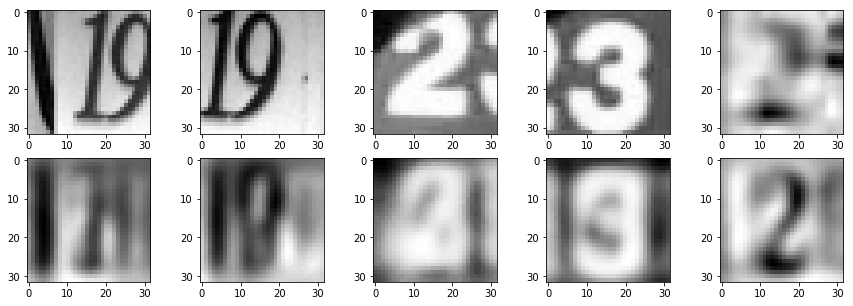

In [8]:
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # plot original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_gray[i].reshape(32, 32), cmap='gray')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(32, 32), cmap='gray')
plt.show()